---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [114]:
#EDA에 사용할 라이브러리를 import 하세요
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [29]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data=pd.read_csv('sbikedata.csv')
data

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


In [30]:
data.tail(10)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5817,2021-11-29,15,33.0,22.0,0.017,13.1,0,1.7,50,2000,251
5818,2021-11-29,16,44.0,34.0,0.006,13.3,0,1.6,49,2000,228
5819,2021-11-29,17,50.0,37.0,0.003,11.6,0,2.2,55,1518,355
5820,2021-11-29,18,54.0,40.0,0.002,11.1,0,1.2,59,1348,516
5821,2021-11-29,19,57.0,44.0,0.002,10.3,0,1.2,62,1272,332
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [172]:
data.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,discomfort,feel_temp
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.00000,5670.000000,5670.000000,5670.000000,5670.000000
mean,11.495238,31.580423,15.332451,0.031793,19.418959,0.075309,2.231217,68.61552,1763.198765,215.869841,388.856903,21.115215
std,6.953965,42.811991,12.860270,0.018250,7.455268,0.263912,1.046569,17.28755,484.862120,186.974342,497.197863,7.911737
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.00000,60.000000,1.000000,-1113.200000,-3.528355
25%,5.000000,16.000000,7.000000,0.019000,14.200000,0.000000,1.500000,56.00000,1943.000000,53.000000,42.614750,15.510850
50%,11.000000,24.500000,13.000000,0.031000,20.500000,0.000000,2.150000,70.00000,2000.000000,186.000000,490.396000,22.238784
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.00000,2000.000000,317.000000,782.481250,26.930515
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.00000,2000.000000,1746.000000,1242.976000,39.084423


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.
- x(독립변수), y(종속변수)
- y와 x의 관련여부 -> 가설설정

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면
x->온도
y->따릉이

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : ㅇ 귀무가설:  시간과 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 시간과 따릉이 대여량 간에는 연관성이 있다.

- 가설 3 :ㅇ 귀무가설: 온도와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 온도와 따릉이 대여량 간에는 연관성이 있다.

- 가설 4 :ㅇ 귀무가설: 습도와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 습도와 따릉이 대여량 간에는 연관성이 있다.

- 가설 5 :ㅇ 귀무가설: 미세먼지 수치와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 미세먼지 수치와 따릉이 대여량 간에는 연관성이 있다.

- 가설 6 :ㅇ 귀무가설: 오존 수치와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 오존 수치와 따릉이 대여량 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

시간에 따라 따릉이 이용자수가 변화할 것이다. 퇴근시간 또는 출근시간에 따릉이 이용자수가 늘 것이다.

2. 변수가 수치형인지 범주형인지


In [32]:
#변수의 자료형을 확인해보세요.

In [33]:
data['hour'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [3]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [34]:
data.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

In [16]:
# data = data.loc[data['ozone'].notnull()] #결측치 제거
# data = data.loc[data['PM10'].notnull()] #결측치 제거
# data = data.loc[data['PM2.5'].notnull()] #결측치 제거

In [35]:
data.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

4. 변수의 기초 통계량 확인

In [36]:
#변수의 기초 통계량을 확인해보세요.

In [37]:
data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

In [38]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='hour', ylabel='Count'>

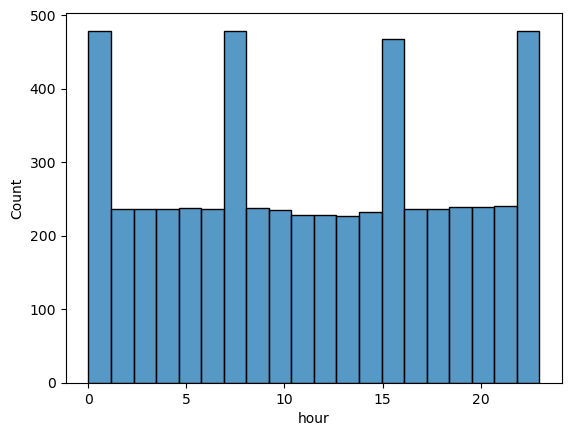

In [208]:
sns.histplot(x= 'hour', data = data, bins = 20)

<Axes: xlabel='hour', ylabel='count'>

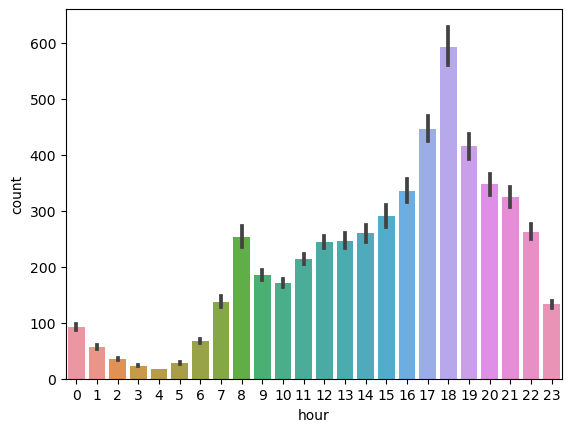

In [209]:
sns.barplot(x='hour',y='count',data=data)

<Axes: xlabel='hour', ylabel='count'>

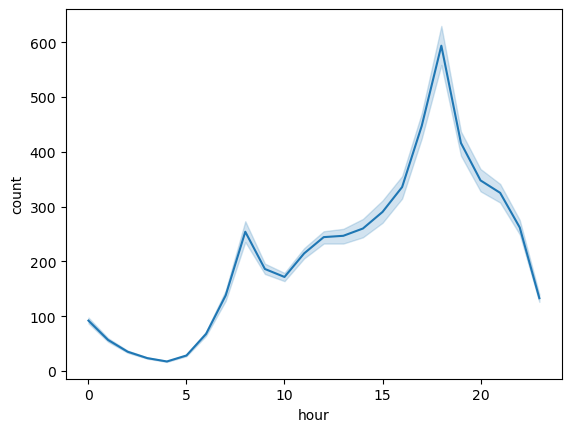

In [211]:
sns.lineplot(x='hour', y='count',data=data)

<Axes: xlabel='hour', ylabel='Density'>

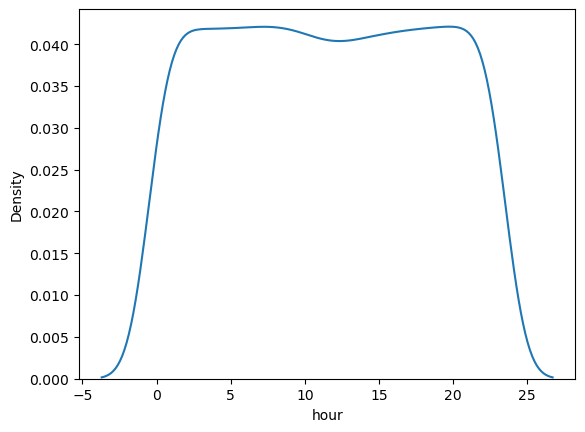

In [192]:
sns.kdeplot(x='hour', data = data)

<Axes: xlabel='hour'>

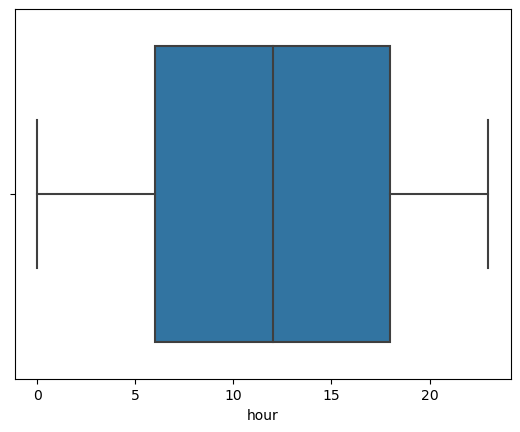

In [58]:
sns.boxplot(x = data['hour'])

6. 위 정보로 부터 파악한 내용 정리

In [41]:
#위 정보로부터 파악하신 내용을 정리해보세요.

5~6시간의 간격으로 따릉이 대여수가 증가한다.

7. 추가 분석사항 도출

In [42]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

이용시간 0 : 단말기 시스템의 오류, 자전거의 고장, 또는 이용자의 변심

In [188]:
data['date'].dtype

dtype('O')

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

온도가 매우 낮거나 매우 높을수록 따릉이 이용자수가 감소할 것이다.

2. 변수가 수치형인지 범주형인지


In [43]:
#변수의 자료형을 확인해보세요.

In [44]:
data['temperature'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [45]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [46]:
data.isna().sum()
# data = data.loc[data['ozone'].notnull()] #결측치 제거
# data = data.loc[data['PM10'].notnull()] #결측치 제거
# data = data.loc[data['PM2.5'].notnull()] #결측치 제거

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

4. 변수의 기초 통계량 확인

In [47]:
#변수의 기초 통계량을 확인해보세요

In [48]:
data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인describe

In [49]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='temperature', ylabel='Count'>

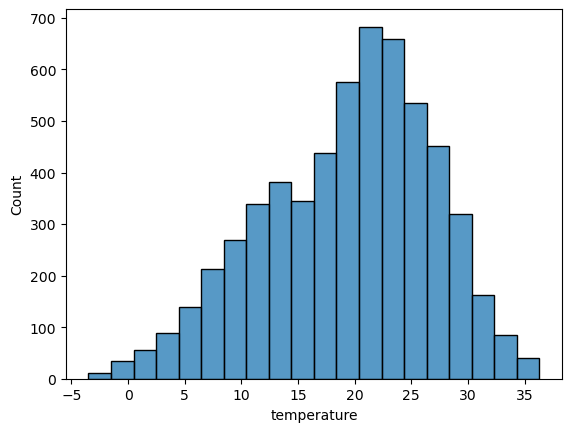

In [50]:
sns.histplot(x= 'temperature', data = data, bins = 20)

<Axes: xlabel='temperature'>

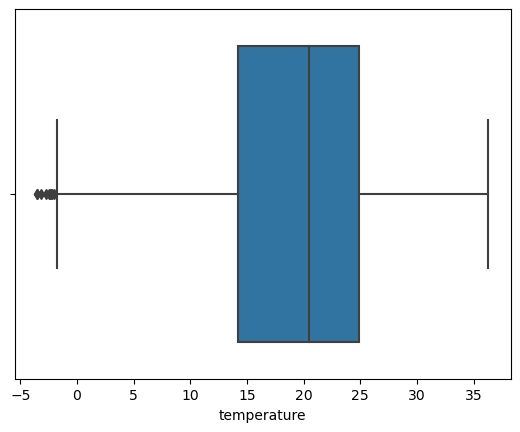

In [173]:
sns.boxplot(x = data['temperature'])

<Axes: xlabel='temperature', ylabel='Density'>

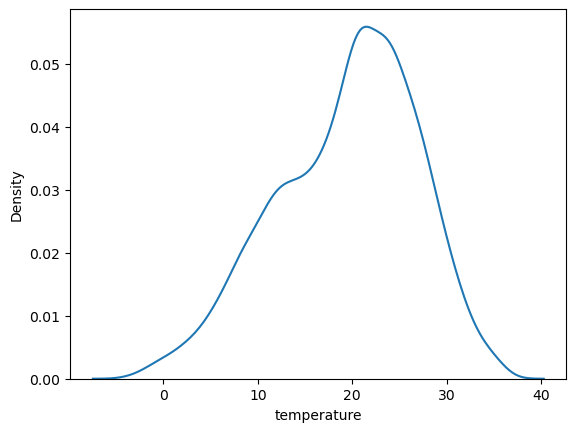

In [193]:
sns.kdeplot(x='temperature', data = data)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

온도가 상승할수록 꾸준히 대여량이 증가하다가 23도를 기점으로 하강한다.
21~22도에서 가장 높은 대여량을 보인다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

강우 여부, 비가 오지 않았으면 0, 비가 오면 1
비가 오면 따릉이 이용자수가 감소할 것이다.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [62]:
data['precipitation'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [60]:
data.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [64]:
data['precipitation'].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

In [1]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='precipitation', ylabel='count'>

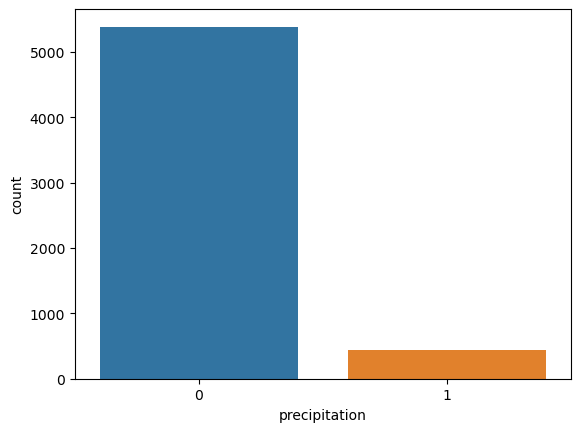

In [66]:
sns.countplot(x = 'precipitation', data = data)

([<matplotlib.patches.Wedge at 0x2886fa36250>,
 [Text(-1.0693574361995108, 0.2578268287917479, '0'),
  Text(1.0693574543041255, -0.2578267537013955, '1')],
 [Text(-0.5832858742906422, 0.14063281570458974, '92.47%'),
  Text(0.5832858841658867, -0.14063277474621572, '7.53%')])

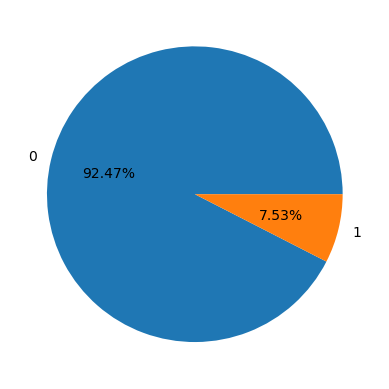

In [179]:
temp = data['precipitation'].value_counts()
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

비가 오지 않을 경우의 따릉이 이용자수가 매우 많다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

풍속(평균) , 풍속이 강할수록 따릉이 이용자수가 감소할 것이다.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [67]:
data['windspeed'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [68]:
data.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [69]:
data['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='windspeed', ylabel='Count'>

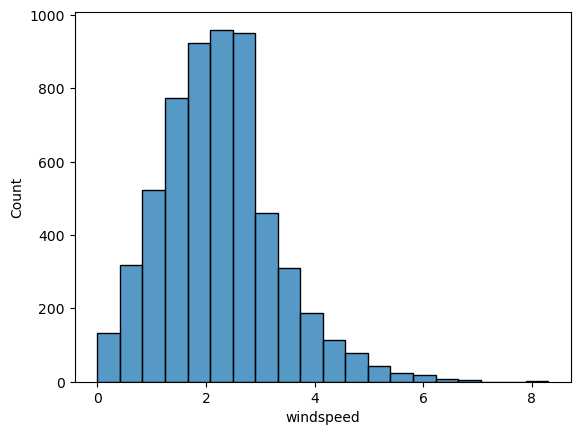

In [70]:
sns.histplot(x= 'windspeed', data = data, bins = 20)

<Axes: xlabel='windspeed'>

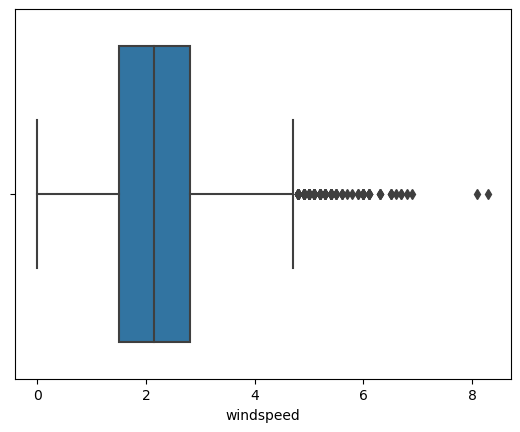

In [175]:
sns.boxplot(x = data['windspeed'])

<Axes: xlabel='windspeed', ylabel='Density'>

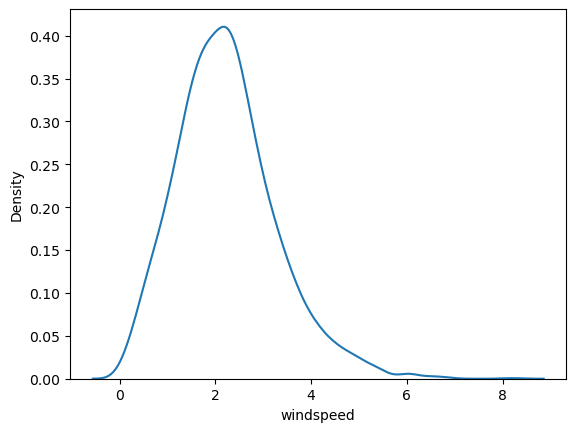

In [194]:
sns.kdeplot(x='windspeed', data = data)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

풍속이 2이상일 경우까지 따릉이 이용자수가 증가하다가 점차 감소하며 풍속이 6이상일 경우 극히 희박하게 따릉이를 이용한다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

풍속이 7일경우 거의 없는 수준인데 풍속이 8이상인 경우에서 따릉이 이용자 분석

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

습도, 습도가 높을수록 따릉이 이용자수가 감소할 것이다.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [71]:
data['humidity'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [72]:
data.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [73]:
data['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='humidity', ylabel='Count'>

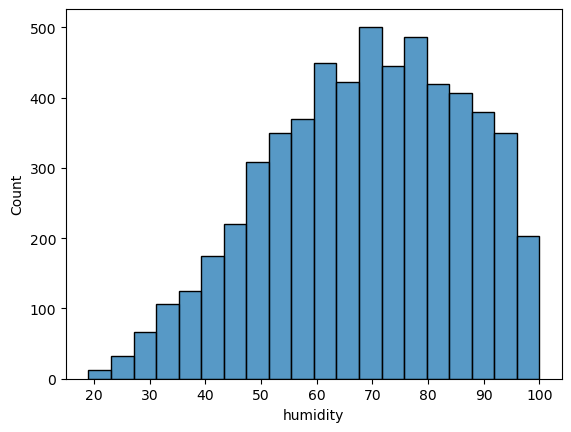

In [74]:
sns.histplot(x= 'humidity', data = data, bins = 20)

<Axes: xlabel='humidity'>

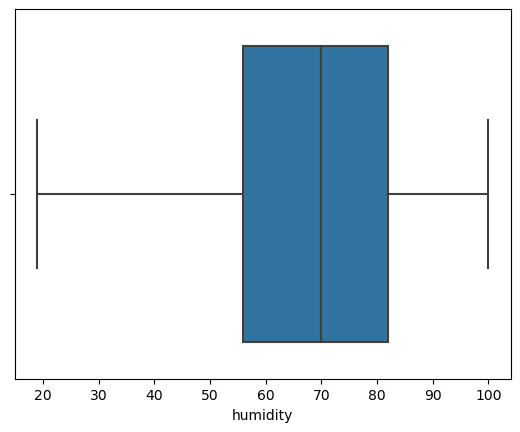

In [176]:
sns.boxplot(x = data['humidity'])

<Axes: xlabel='humidity', ylabel='Density'>

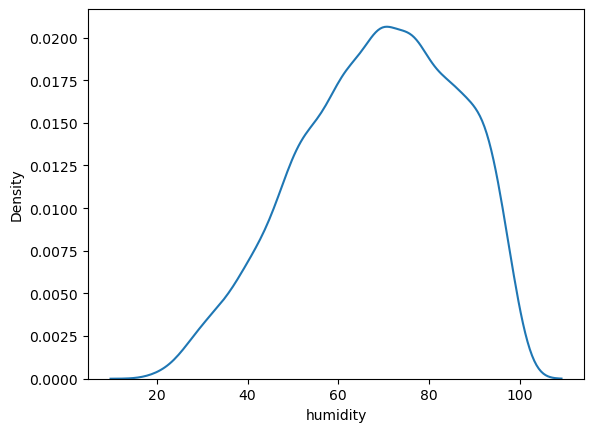

In [195]:
sns.kdeplot(x='humidity', data = data)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

습도가 증가할수록 꾸준히 이용자가 증가하다가 60~80까지 가장 높은 이용자수를 보이며 그 이후로 감소한다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

95~100일때 급속히 이용자수가 감소, 같은 범위 구간으로 봤을 때 왜 습도가 낮을때보다 높을때 더 많이 이용하는것인지.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
가시성이 높아야 따릉이 이용자수가 증가할 것이다.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [75]:
data['visibility'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [76]:
data.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [77]:
data['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='visibility', ylabel='Count'>

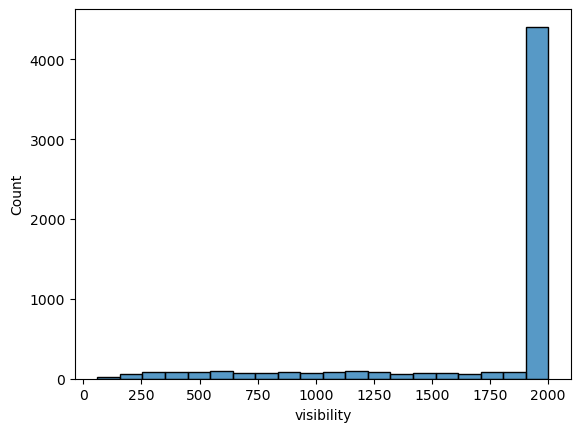

In [82]:
sns.histplot(x= 'visibility', data = data, bins = 20)

<Axes: xlabel='visibility'>

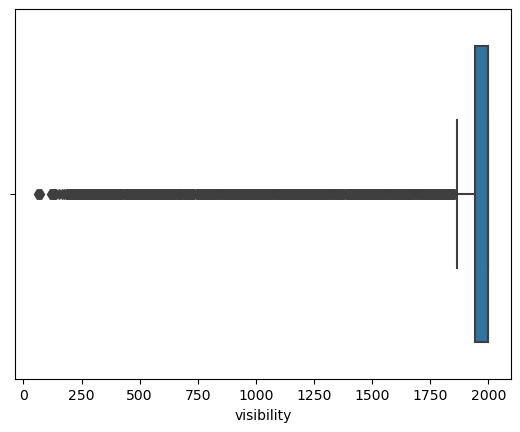

In [177]:
sns.boxplot(x = data['visibility'])

<Axes: xlabel='visibility', ylabel='Density'>

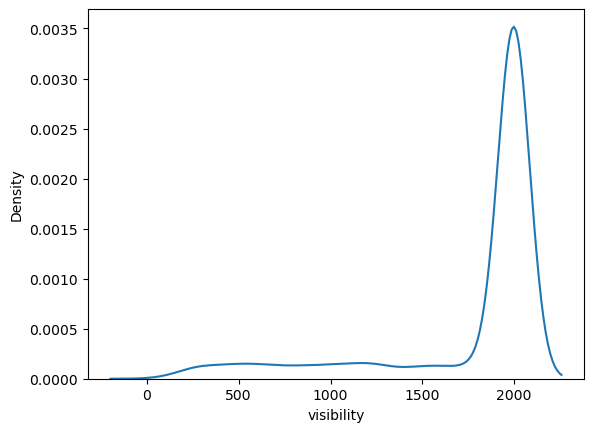

In [196]:
sns.kdeplot(x='visibility', data = data)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

가시성이 2000정도일때만 이용자수가 높음.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

오존농도가 높을수록 따릉이 이용자수가 감소할 것이다.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [83]:
data['ozone'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [86]:
data = data.loc[data['ozone'].notnull()] #결측치 제거
data.isna().sum()

date              0
hour              0
PM10             22
PM2.5            14
ozone             0
temperature       0
precipitation     0
windspeed         0
humidity          0
visibility        0
count             0
dtype: int64

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [87]:
data['ozone'].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='ozone', ylabel='Count'>

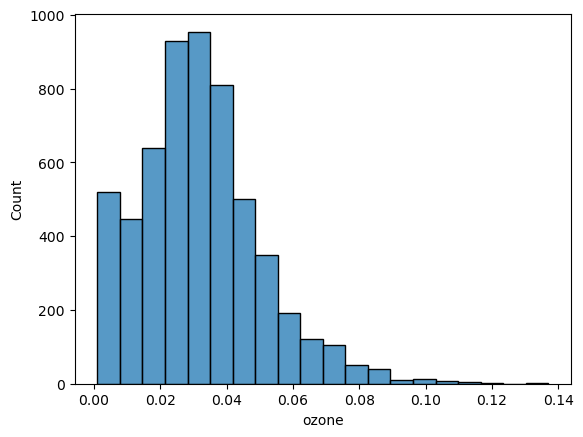

In [88]:
sns.histplot(x= 'ozone', data = data, bins = 20)

<Axes: xlabel='ozone'>

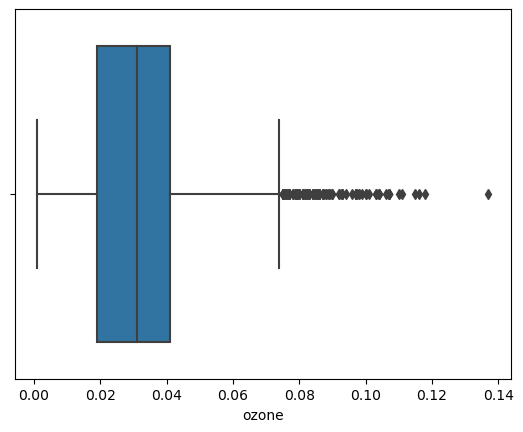

In [178]:
sns.boxplot(x = data['ozone'])

<Axes: xlabel='ozone', ylabel='Density'>

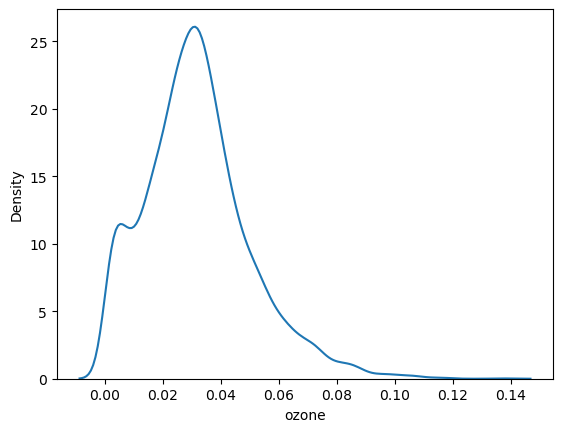

In [197]:
sns.kdeplot(x='ozone', data = data)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

좋음 : 0.030이하, 나쁨 0.091~0.150
오존농도가 좋을 경우에 이용자수가 많고 보통수준인 0.03 이후부터 감소하다가 나쁨수준일 경우 이용자수가 급격하게 줄어든다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

오존농도에 따른 이용자수가 연관이 있는것인가

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

미세먼지 농도가 증가할수록 이용자수가 감소할 것이다.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [89]:
data['PM10'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [90]:

data = data.loc[data['PM10'].notnull()] #결측치 제거
data.isna().sum()

date             0
hour             0
PM10             0
PM2.5            7
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [91]:
data['PM10'].describe()

count    5677.000000
mean       31.588339
std        42.786622
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='PM10', ylabel='Count'>

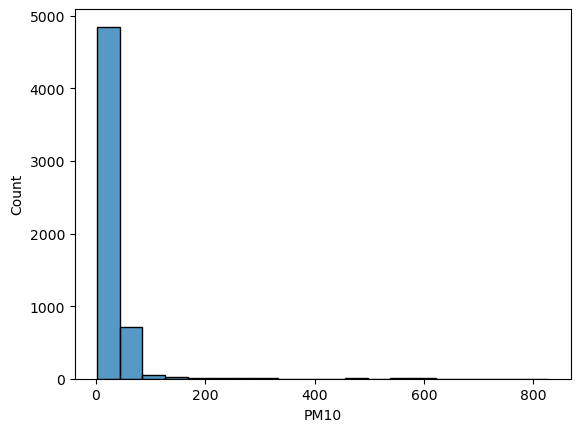

In [95]:
sns.histplot(x= 'PM10', data = data, bins = 20)

<Axes: xlabel='PM10'>

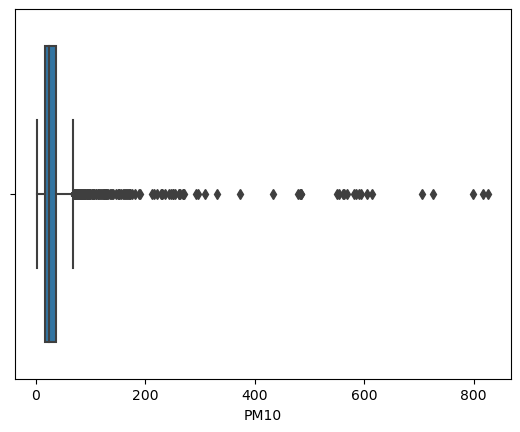

In [96]:
sns.boxplot(x = data['PM10'])

<Axes: xlabel='PM10', ylabel='Density'>

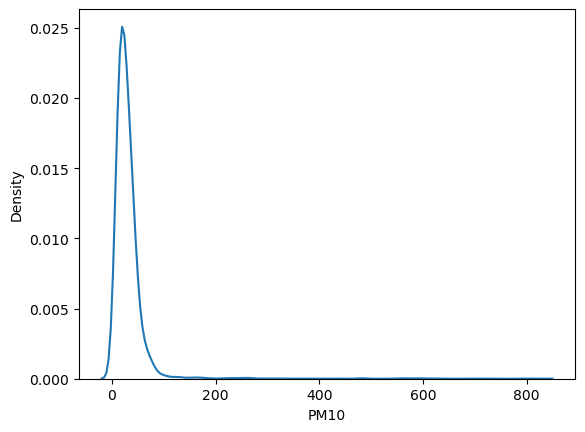

In [97]:
sns.kdeplot(x='PM10', data = data)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

권고 : pm10 100μg/m3 (일)

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

미세먼지 농도가 증가할수록 이용자수가 감소할 것이다.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [98]:
data['PM2.5'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [102]:

data = data.loc[data['PM2.5'].notnull()] #결측치 제거
data.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [103]:
data['PM2.5'].describe()

count    5670.000000
mean       15.332451
std        12.860270
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='PM2.5', ylabel='Count'>

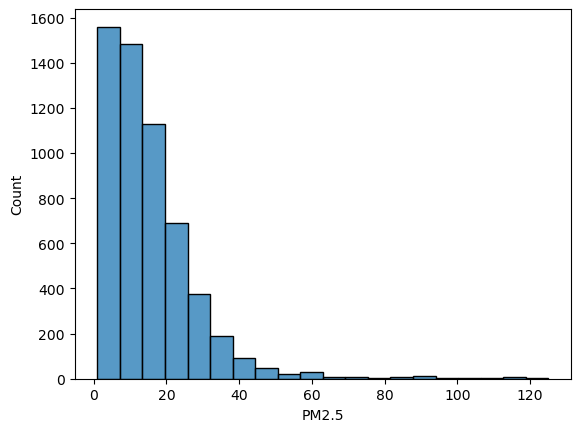

In [104]:
sns.histplot(x= 'PM2.5', data = data, bins = 20)


<Axes: xlabel='PM2.5'>

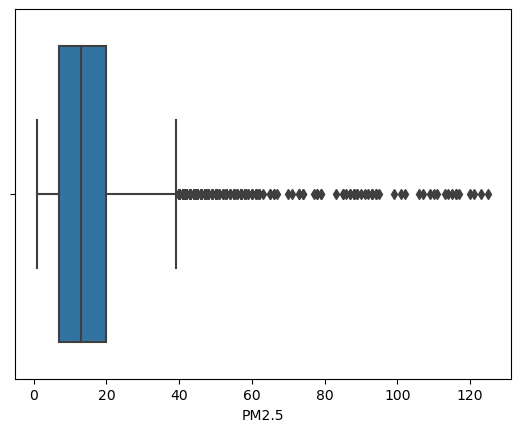

In [105]:

sns.boxplot(x = data['PM2.5'])

<Axes: xlabel='PM2.5', ylabel='Density'>

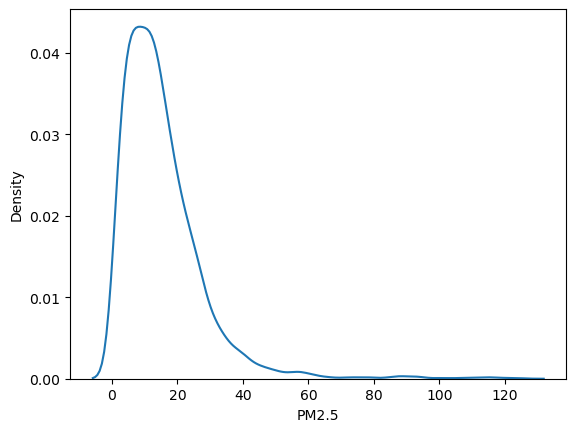

In [106]:

sns.kdeplot(x='PM2.5', data = data)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

권고 : pm2.5 35μg/m3 (일)
35 이하에서 이용자 수가 많음. 35를 넘어가면 이용자수가 급격하게 감소

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

80이상, 120이하의 사람들은??

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

시간에 따른 따릉이 대여 수

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [107]:
data['count'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [108]:
data.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [109]:
data['count'].describe()

count    5670.000000
mean      215.869841
std       186.974342
min         1.000000
25%        53.000000
50%       186.000000
75%       317.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<Axes: xlabel='count', ylabel='Count'>

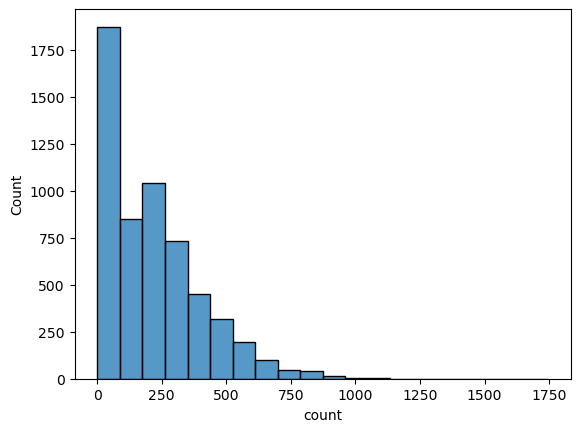

In [110]:
sns.histplot(x= 'count', data = data, bins = 20)

<Axes: xlabel='count'>

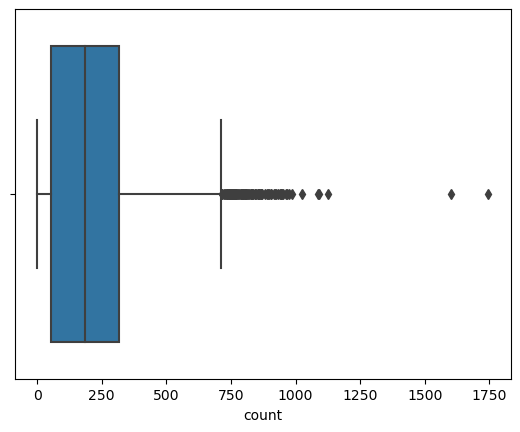

In [199]:
sns.boxplot(x = data['count'])

<Axes: xlabel='count', ylabel='Density'>

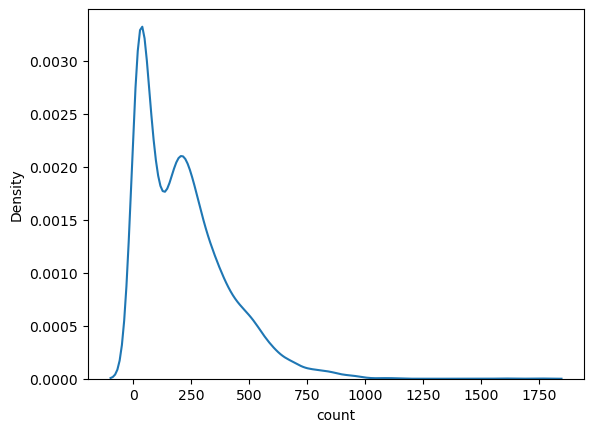

In [198]:
sns.kdeplot(x='count', data = data)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

이용자수가 250 이상일 경우 따릉이 갯수 부족?? 이용자가 감소한다. 이용자수가 늘수록 더 타려고한다?

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

이용자가 늘수록 이용갯수가 감소하는 이유!!!
이용시간 0 : 단말기 시스템의 오류, 자전거의 고장, 또는 이용자의 변심

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [9]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [115]:
sunny = data.loc[data['precipitation']==0, 'count'] #강우x
rainy = data.loc[data['precipitation']==1, 'count'] #강우O
#t-test

spst.ttest_ind(sunny, rainy) #앞(died)의 것에서 뒤(survived)의 것을 뺌

Ttest_indResult(statistic=20.998879971563788, pvalue=2.428442706503082e-94)

In [ ]:
t통계량이 2보다크므로 차이가 있다, pvalue가 0.05보다 작으므로 상관이 있다.

<Axes: xlabel='precipitation', ylabel='count'>

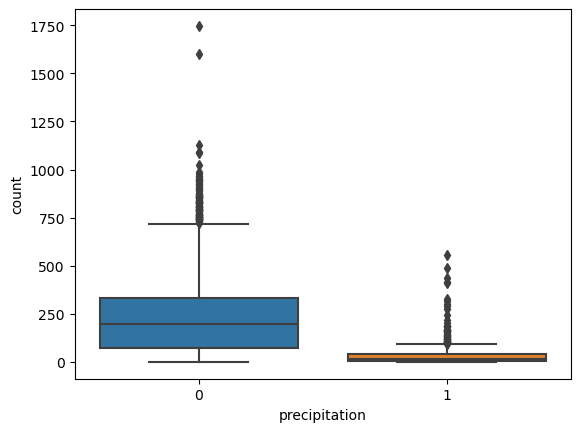

In [112]:
sns.boxplot(x='precipitation', y = 'count', data = data)

<Axes: xlabel='precipitation', ylabel='count'>

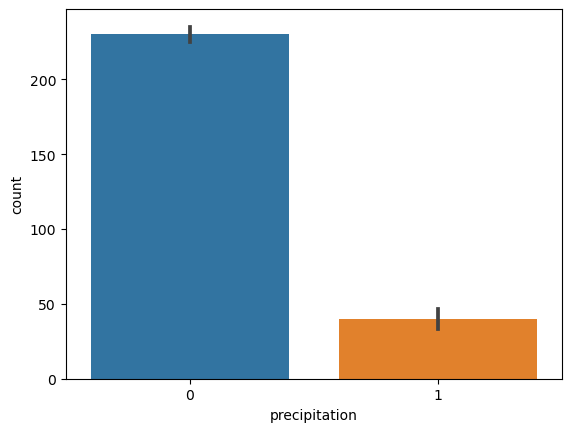

In [111]:
sns.barplot(x='precipitation',y='count',data=data)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [10]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

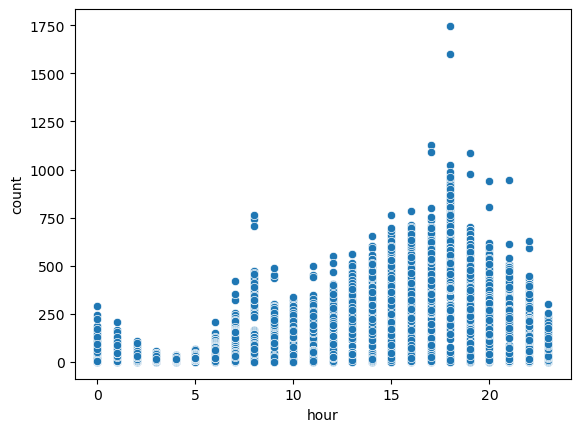

In [150]:
#산점도
sns.scatterplot(x='hour', y='count', data = data)
plt.show()

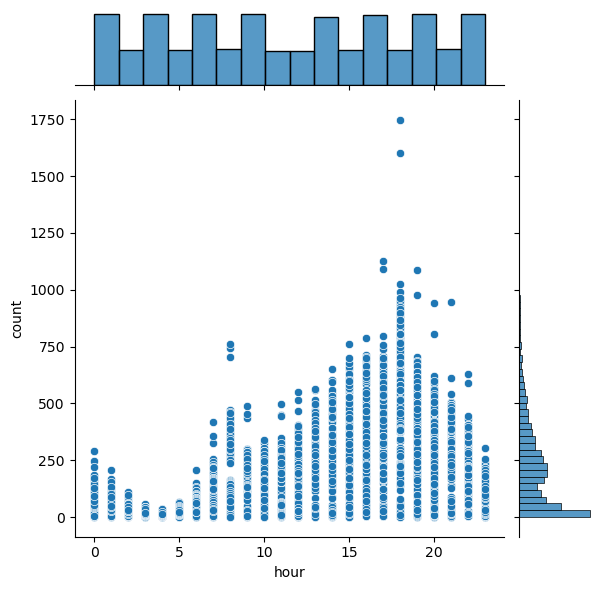

In [151]:
sns.jointplot(x='hour', y='count', data = data)

<Axes: xlabel='hour', ylabel='count'>

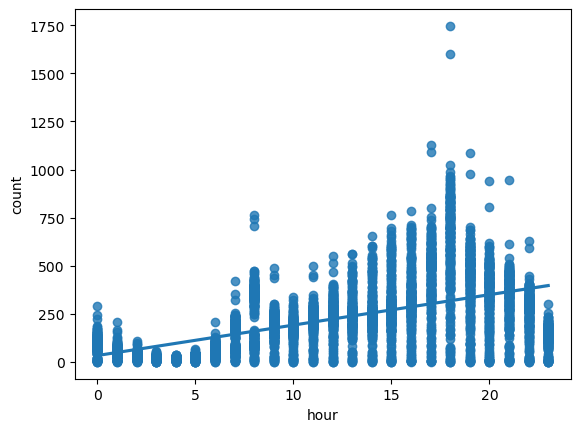

In [134]:
sns.regplot(x='hour', y='count', data = data) 

In [118]:
#상관분석
spst.pearsonr(data['hour'], data['count']) 

PearsonRResult(statistic=0.587558535914158, pvalue=0.0)

상관계수가 0.5이상이므로 강한 상관관계가 있다. pvalue 0.05이하이므로 두 변수간에 관계가 있다. 상관계수가 의미가 있다.

3. 온도 데이터와 따릉이 대여량간 분석

In [11]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

<Axes: xlabel='temperature', ylabel='count'>

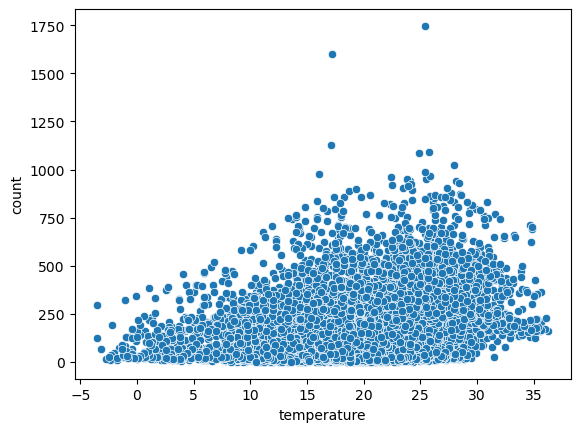

In [119]:
#산점도
sns.scatterplot(x='temperature', y='count', data = data)
#sns.pairplot(air)
#sns.jointplot(x='Temp', y='Ozone', data = air)
#sns.regplot(x='Solar.R', y='Ozone', data = air) 

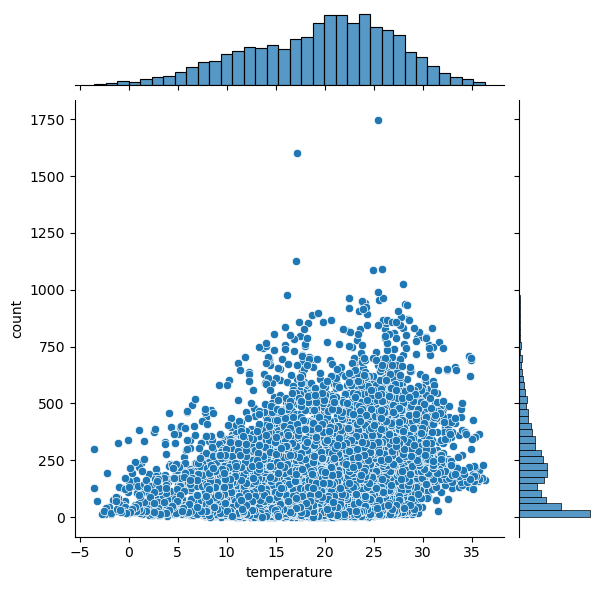

In [152]:
sns.jointplot(x='temperature', y='count', data = data)

In [120]:
#상관분석
spst.pearsonr(data['temperature'], data['count']) 

PearsonRResult(statistic=0.27416222788541533, pvalue=2.585011313544074e-98)

상관계수가 0.27정도로 중간관계의 상관관계가 있다. pvalue 0.05이하이므로 두 변수간에 관계가 있다. 상관계수가 의미가 있다.

4. 풍속 데이터와 따릉이 대여량간 분석

In [12]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

<Axes: xlabel='windspeed', ylabel='count'>

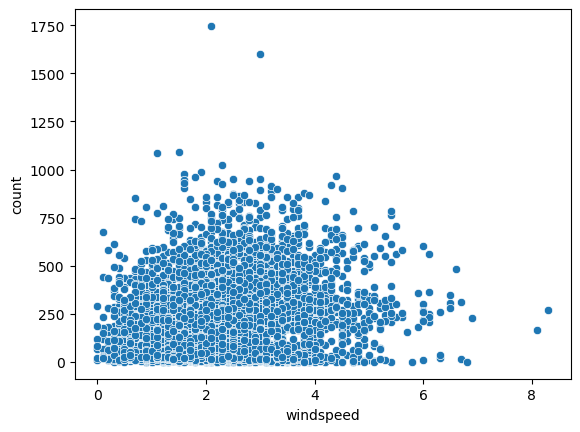

In [121]:
#산점도
sns.scatterplot(x='windspeed', y='count', data = data)
#sns.pairplot(air)
#sns.jointplot(x='Temp', y='Ozone', data = air)
#sns.regplot(x='Solar.R', y='Ozone', data = air) 

In [122]:
#상관분석
spst.pearsonr(data['windspeed'], data['count']) 

PearsonRResult(statistic=0.22922151636418522, pvalue=1.7134562728086756e-68)

상관계수가 0.2이상이므로 중간관계의 상관관계가 있다. pvalue 0.05이하이므로 두 변수간에 관계가 있다. 상관계수가 의미가 있다.

5. 습도 데이터와 따릉이 대여량간 분석

In [13]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

<Axes: xlabel='humidity', ylabel='count'>

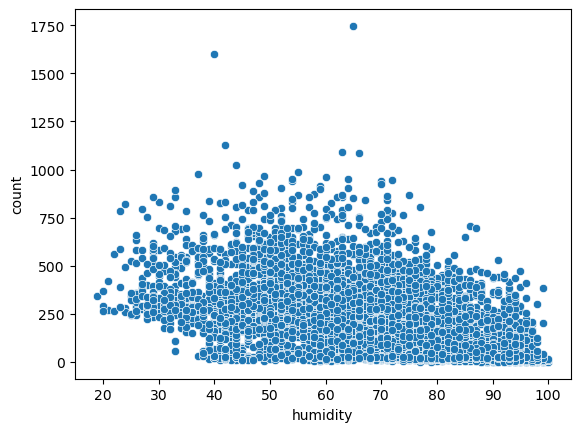

In [123]:
#산점도
sns.scatterplot(x='humidity', y='count', data = data)
#sns.pairplot(air)
#sns.jointplot(x='Temp', y='Ozone', data = air)
#sns.regplot(x='Solar.R', y='Ozone', data = air) 

In [124]:
#상관분석
spst.pearsonr(data['humidity'], data['count']) 

PearsonRResult(statistic=-0.48074217482491177, pvalue=0.0)

상관계수가 음의 중간정도의 상관관계가 있다. pvalue 0.05이하이므로 두 변수간에 관계가 있다. 상관계수가 의미가 있다.

6. 시정 데이터와 따릉이 대여량간 분석

In [14]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

<Axes: xlabel='visibility', ylabel='count'>

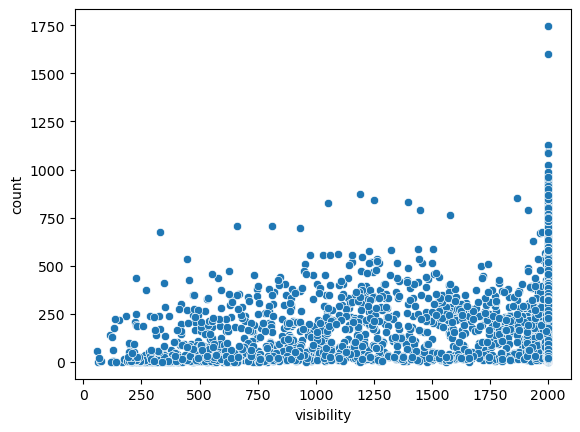

In [125]:
#산점도
sns.scatterplot(x='visibility', y='count', data = data)
#sns.pairplot(air)
#sns.jointplot(x='Temp', y='Ozone', data = air)
#sns.regplot(x='Solar.R', y='Ozone', data = air) 

<Axes: xlabel='visibility', ylabel='count'>

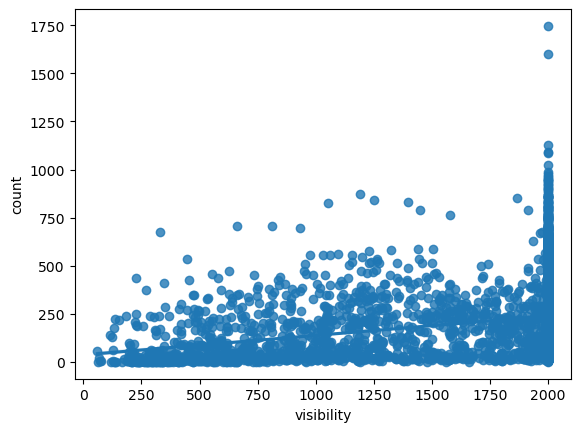

In [155]:
sns.regplot(x='visibility', y='count', data = data) 

In [187]:
data[['visibility']].tail(10)

,visibility
5817,2000
5818,2000
5819,1518
5820,1348
5821,1272
5822,1193
5823,1233
5824,1250
5825,1262
5826,1483


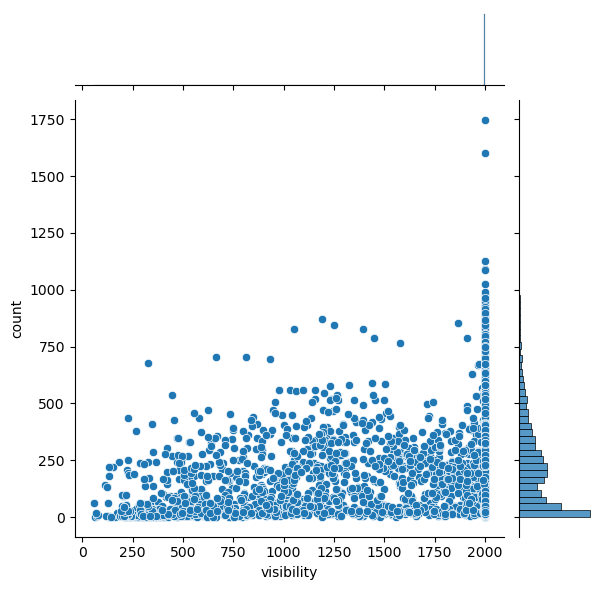

In [156]:
sns.jointplot(x='visibility', y='count', data = data)

In [126]:
#상관분석
spst.pearsonr(data['visibility'], data['count']) 

PearsonRResult(statistic=0.26207314766928064, pvalue=1.069132820550618e-89)

상관계수가 중간정도의 상관관계가 있다. pvalue 0.05이하이므로 두 변수간에 관계가 있다. 상관계수가 의미가 있다.

7. 오존 데이터와 따릉이 대여량간 분석

In [15]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

<Axes: xlabel='ozone', ylabel='count'>

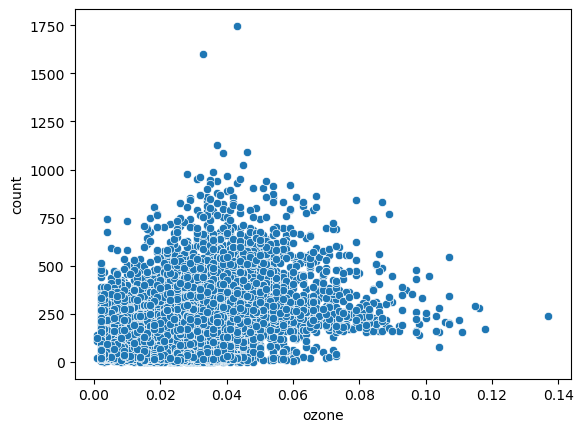

In [127]:
#산점도
sns.scatterplot(x='ozone', y='count', data = data)
#sns.pairplot(air)
#sns.jointplot(x='Temp', y='Ozone', data = air)
#sns.regplot(x='Solar.R', y='Ozone', data = air) 

In [128]:
#상관분석
spst.pearsonr(data['ozone'], data['count']) 

PearsonRResult(statistic=0.3143357943088431, pvalue=3.025523189264917e-130)

상관계수가 0.3정도로 중간정도의 상관관계가 있다. pvalue 0.05이하이므로 두 변수간에 관계가 있다. 상관계수가 의미가 있다.

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [16]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

<Axes: xlabel='PM10', ylabel='count'>

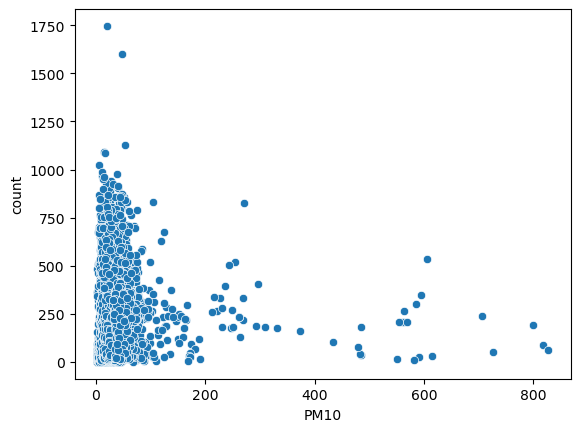

In [129]:
#산점도
sns.scatterplot(x='PM10', y='count', data = data)
#sns.pairplot(air)
#sns.jointplot(x='Temp', y='Ozone', data = air)
#sns.regplot(x='Solar.R', y='Ozone', data = air) 

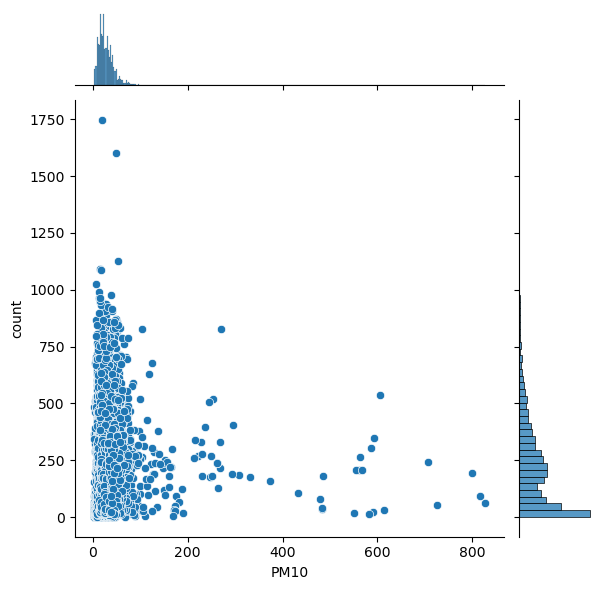

In [157]:
sns.jointplot(x='PM10', y='count', data = data)

In [130]:
#상관분석
spst.pearsonr(data['PM10'], data['count']) 

PearsonRResult(statistic=0.03262773163856617, pvalue=0.014011785053987003)

상관계수가 0.03으로 거의 없는 수준의 상관관계가 있다. pvalue 0.05이하이므로 두 변수간에 관계가 있다. 상관계수가 의미가 있다.

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [17]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

<Axes: xlabel='PM2.5', ylabel='count'>

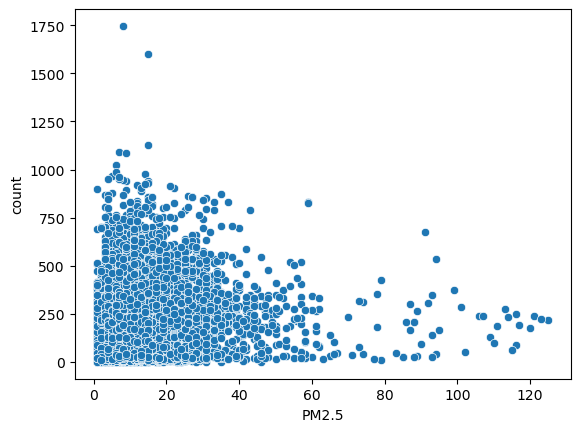

In [131]:
#산점도
sns.scatterplot(x='PM2.5', y='count', data = data)
#sns.pairplot(air)
#sns.jointplot(x='Temp', y='Ozone', data = air)
#sns.regplot(x='Solar.R', y='Ozone', data = air) 

In [132]:
#상관분석
spst.pearsonr(data['PM2.5'], data['count']) 

PearsonRResult(statistic=0.0529237283818275, pvalue=6.690256718090878e-05)

상관계수가 0.05이상이므로 거의 없는 수준의 상관관계가 있다. pvalue 0.05이하이므로 두 변수간에 관계가 있다. 상관계수가 의미가 있다.

C:\Users\user\AppData\Local\Temp\ipykernel_16892\2741725817.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


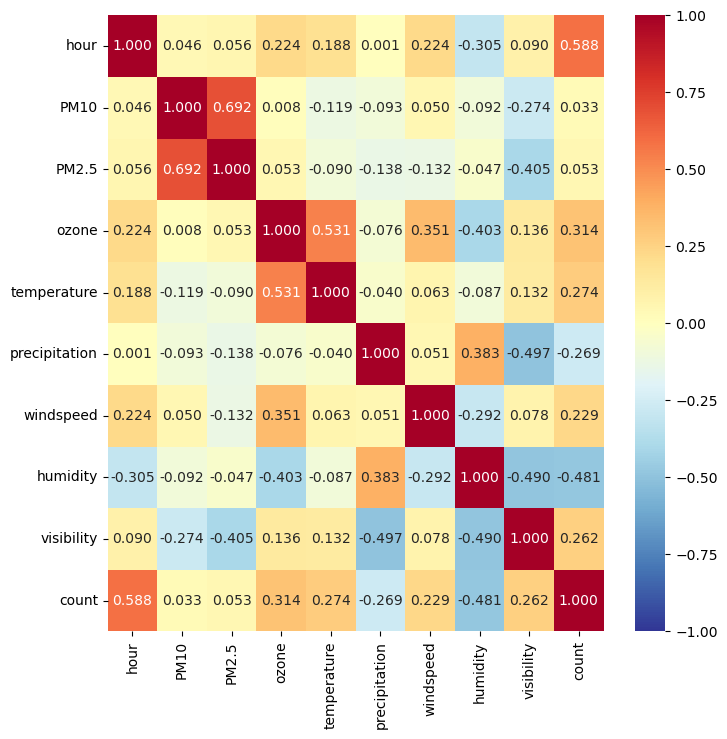

In [160]:
plt.figure(figsize = (8, 8))
sns.heatmap(data.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

In [159]:
data.corr() 

C:\Users\user\AppData\Local\Temp\ipykernel_16892\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
hour,1.000000,0.045693,0.056238,0.224323,0.188384,0.000916,0.223520,-0.304854,0.090437,0.587559
PM10,0.045693,1.000000,0.692439,0.008235,-0.118791,-0.093438,0.050168,-0.091791,-0.274157,0.032628
PM2.5,0.056238,0.692439,1.000000,0.053284,-0.089720,-0.137832,-0.131809,-0.046645,-0.405487,0.052924
ozone,0.224323,0.008235,0.053284,1.000000,0.531382,-0.075875,0.350649,-0.403433,0.136367,0.314336
temperature,0.188384,-0.118791,-0.089720,0.531382,1.000000,-0.040147,0.062704,-0.086916,0.131999,0.274162
precipitation,0.000916,-0.093438,-0.137832,-0.075875,-0.040147,1.000000,0.050690,0.383162,-0.497019,-0.268666
windspeed,0.223520,0.050168,-0.131809,0.350649,0.062704,0.050690,1.000000,-0.291527,0.077832,0.229222
humidity,-0.304854,-0.091791,-0.046645,-0.403433,-0.086916,0.383162,-0.291527,1.000000,-0.490143,-0.480742
visibility,0.090437,-0.274157,-0.405487,0.136367,0.131999,-0.497019,0.077832,-0.490143,1.000000,0.262073
count,0.587559,0.032628,0.052924,0.314336,0.274162,-0.268666,0.229222,-0.480742,0.262073,1.000000


In [ ]:
sns.scatterplot(x='PM10', y='count', data = data)

<Axes: xlabel='windspeed', ylabel='count'>

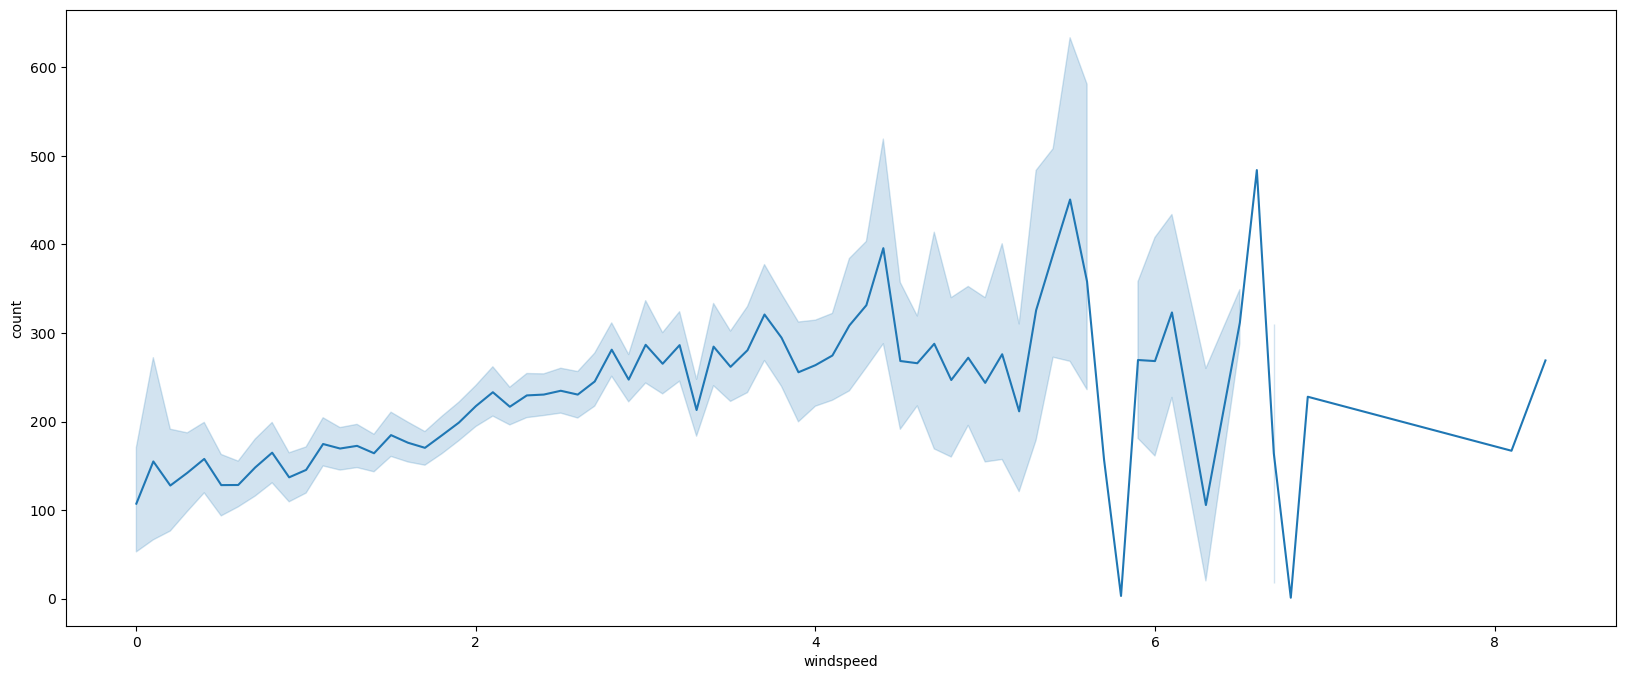

In [202]:
plt.figure(figsize=(20,8))
sns.lineplot(x='windspeed', y='count',data=data)

<Axes: xlabel='temperature', ylabel='count'>

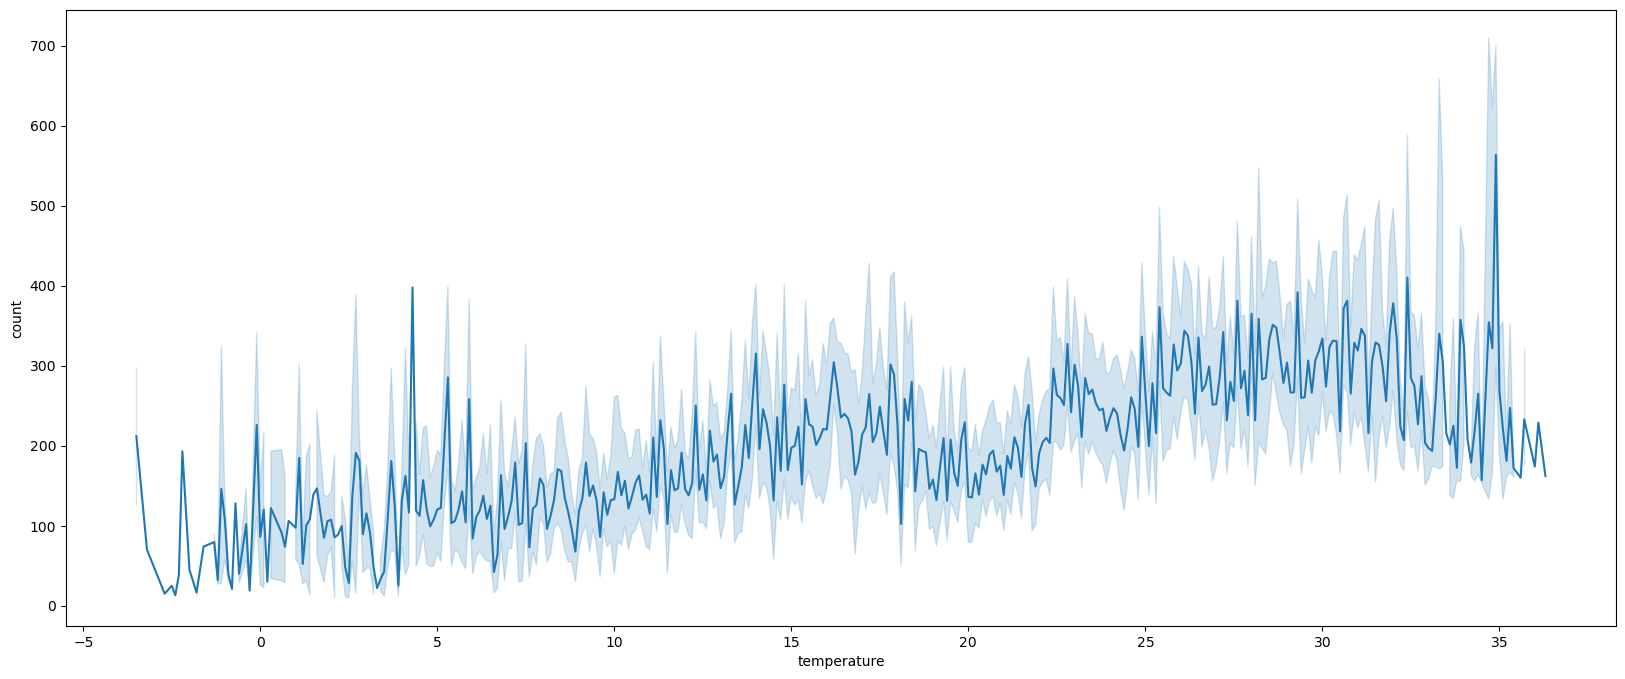

In [206]:
plt.figure(figsize=(20,8))
sns.lineplot(x='temperature', y='count',data=data)

<Axes: xlabel='hour', ylabel='count'>

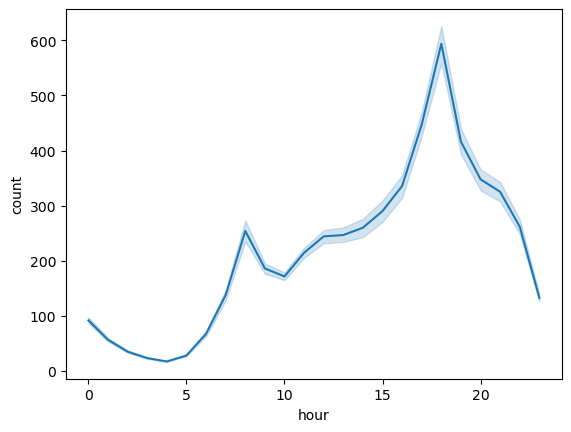

In [204]:
sns.lineplot(x='hour', y='count',data=data)

<Axes: xlabel='date', ylabel='count'>

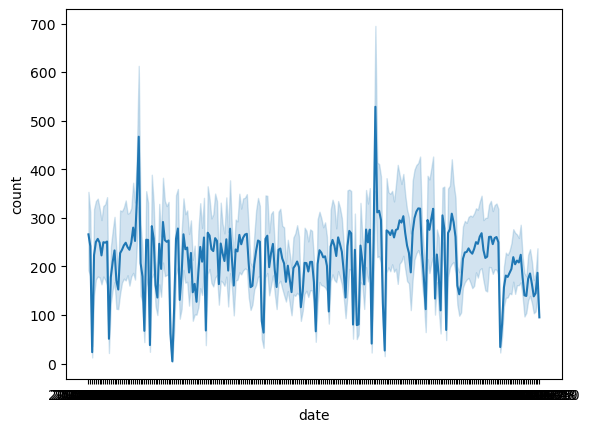

In [205]:
sns.lineplot(x='PM10', y='count',data=data)

In [162]:
# 불쾌지수=1.8*기온–0.55*(1–습도)*(1.8*기온–26)+32
data["discomfort"]= 1.8*data['temperature']-0.55*(1-data['humidity'])*(1.8*data['temperature']-26)+32


In [163]:
# 체감온도 13.12 + 0.6215*기온 - 11.37*(풍속^0.16) + 0.3965*(풍속^0.16)*기온
data["feel_temp"]=13.12+0.6215*data['temperature']-11.37*((data['windspeed']**0.16))+0.3965*((data['windspeed']**0.16))*data['temperature']

In [164]:
data

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,discomfort,feel_temp
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,-8.308,14.744207
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,-50.928,13.559792
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,-0.322,13.750034
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,-6.090,13.750569
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,-6.090,13.829631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,-282.305,12.563518
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,-365.776,9.358282
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,-351.754,9.643874
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,-385.980,9.074292


In [165]:
data.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
discomfort       0
feel_temp        0
dtype: int64

In [167]:
#불쾌지수
spst.pearsonr(data['discomfort'], data['count'])

PearsonRResult(statistic=0.1810673418360959, pvalue=5.456271393710227e-43)

In [ ]:
#약한상관관계가 있음

<Axes: xlabel='discomfort', ylabel='count'>

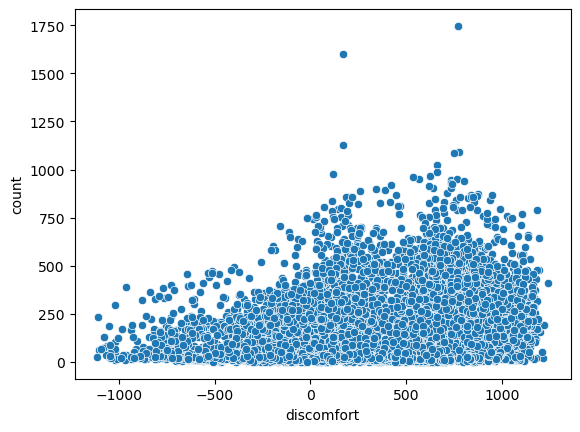

In [170]:
sns.scatterplot(x='discomfort', y='count', data = data)

In [169]:
#체감온도
spst.pearsonr(data['feel_temp'], data['count'])

PearsonRResult(statistic=0.26656807035316277, pvalue=7.540173715273903e-93)

In [ ]:
#중간정도의 상관관계

<Axes: xlabel='feel_temp', ylabel='count'>

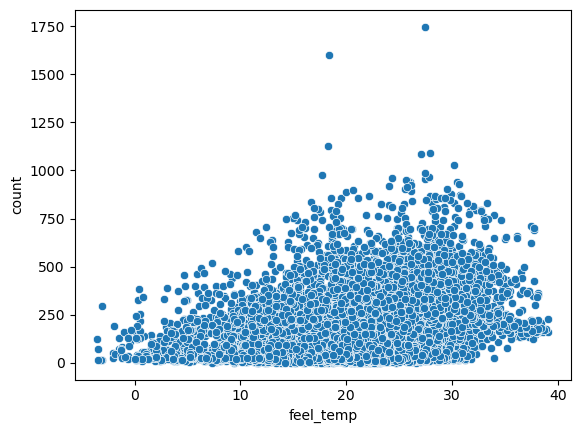

In [171]:
sns.scatterplot(x='feel_temp', y='count', data = data)

<Axes: xlabel='discomfort', ylabel='count'>

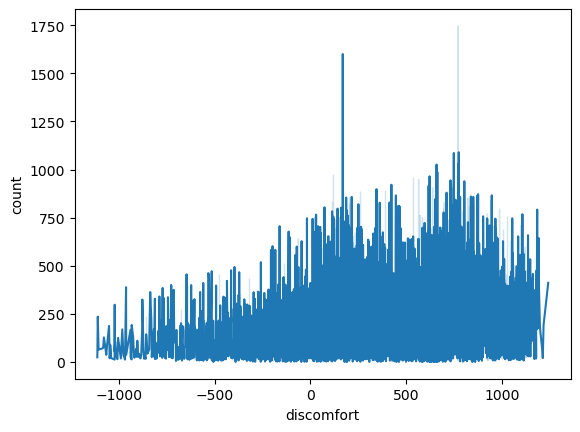

In [212]:
sns.lineplot(x='discomfort', y='count',data=data)

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

시간

In [ ]:
강수여부, 온도,습도,오존 (중간),풍속,가시성,체감온도

#### <font color='green'>2. 약한 관계의 변수</font>


가시성, 풍속, 초미세먼지,불쾌지수

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


미세먼지,초미세먼지

In [ ]:
강 : 시간 (습도) 없 : 초미세먼지,미세먼지, 중간:오존,기온,강우여부,풍속,가시성

### [Step6] Insight 도출

가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다. ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.
가설 2 : ㅇ 귀무가설: 시간과 따릉이간에는 연관성이 없다.

ㅇ 대립가설 : 시간과 따릉이 대여량 간에는 연관성이 있다.

가설 3 :ㅇ 귀무가설: 온도와 따릉이간에는 연관성이 없다.

ㅇ 대립가설 : 온도와 따릉이 대여량 간에는 연관성이 있다.

가설 4 :ㅇ 귀무가설: 습도와 따릉이간에는 연관성이 없다.

ㅇ 대립가설 : 습도와 따릉이 대여량 간에는 연관성이 있다.

가설 5 :ㅇ 귀무가설: 미세먼지 수치와 따릉이간에는 연관성이 없다.

ㅇ 대립가설 : 미세먼지 수치와 따릉이 대여량 간에는 연관성이 있다.

가설 6 :ㅇ 귀무가설: 오존 수치와 따릉이간에는 연관성이 없다.

ㅇ 대립가설 : 오존 수치와 따릉이 대여량 간에는 연관성이 있다.

In [ ]:
시간에 따라 따릉이 이용여부에 관련이 있다. 따라서 이용자수가 많은 시간대에 따릉이 수를 늘려야 한다. (8시 18시) 출근시간, 퇴근시간